In [1]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

import pandas as pd

In [12]:
np.random.choice(houseshold_sizes, p=houseshold_size_distribution)

6

In [46]:
import mesa
import math
import numpy as np

# Number of persons in household - approx percentage for 1,2...7 people - from Statista
houseshold_sizes = [1,2,3,4,5,6,7]
houseshold_size_distribution = [0.28,0.36,0.15,0.12,0.06,0.02,0.01]

# Consumption rate: number of steps per person neded to consume 1 product
consumption_rates = [5,4,3] # low, medium, hi consumption rate


def compute_total_purchases(model):
    purchases = [agent.purchased_this_step for agent in model.schedule.agents]
    return sum(purchases)

class ConsumerAgent(mesa.Agent):
    """Consumer of products"""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.household_size = np.random.choice(houseshold_sizes, p=houseshold_size_distribution)
        self.consumption_rate = np.random.choice(consumption_rates) # Applied at household level
        self.pantry_stock = (np.random.random() * self.household_size) # Initial stock randomized
        self.pantry_max = (self.household_size + 1)
        self.pantry_min = (self.household_size * 0.2)
        self.purchased_this_step = 0

    
    def consume(self):
        self.pantry_stock = (self.pantry_stock - self.household_size/self.consumption_rate)
        
    def shop(self):
        self.purchased_this_step = 0 # Reset purchase count
        # Blind restock - no choices or price sensitivity
        if self.pantry_stock < self.pantry_max:
            self.purchased_this_step += math.floor(self.pantry_max - self.pantry_stock)
        self.pantry_stock += self.purchased_this_step
        
    
    def step(self):
        self.consume()
        self.shop()

        
class ConsumerModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        
        # Create agents
        for i in range(self.num_agents):
            a = ConsumerAgent(i, self)
            self.schedule.add(a)
        
        self.datacollector = mesa.DataCollector(
            model_reporters={
                "Total_Purchases": compute_total_purchases
            },
            agent_reporters={
                "Household_Size": "household_size",
                "Purchased_This_Step": "purchased_this_step",
                "Pantry_Stock": "pantry_stock"
            }
        )

    def step(self):
        self.datacollector.collect(self)
        """Advance the model by one step and collect data"""
        self.schedule.step()

In [44]:
model = ConsumerModel(1000)

for i in range(300):
    model.step()

<Axes: >

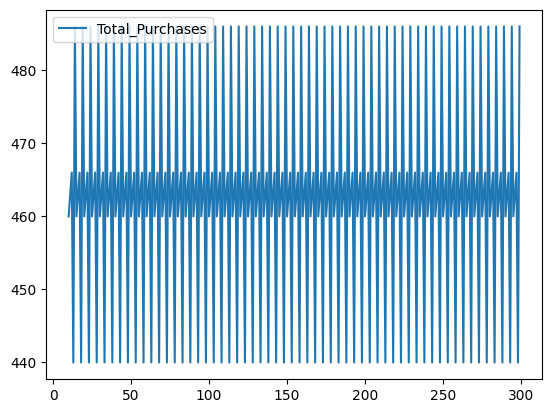

In [45]:
model.datacollector.get_model_vars_dataframe().iloc[10:].plot()

In [47]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 2.7 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 8.5 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.3 MB/s eta 0:00:000m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/vf/m4p5jj9s07x4v_df3mgg2fv40000gn/T/pip-install-mwrv_wns/numba_4908f9b10fdd4b5f8e951e2395b1f08d/setup.py", line 51, in <module>
          _guard_py_ver()
        File "/private/var/folders/vf/m4p5jj9s07x4v_df3mgg2fv40000gn/T/pip-install-mwrv_wns/numba_4908f9b10fdd4b5f8e951e2395b1f08d/setup.py", line 48, in _guard_py_ver
          raise RuntimeErro